### Carga de datos

In [15]:
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 100)

tad = pd.read_parquet('../data/ecobici/tad_viajes_G28.parquet')

tad.head()

,Ciclo_Estacion_Retiro,ancla,v_F_tot_sum_100,v_M_tot_sum_100,v_ND_tot_sum_100,v_edad_prom_sum_100,v_pct_F_sum_100,v_pct_M_sum_100,v_personas_tot_sum_100,v_tiempo_viaje_max_sum_100,v_tiempo_viaje_mean_sum_100,v_tiempo_viaje_min_sum_100,v_tiempo_viaje_std_sum_100,v_F_tot_mean_100,v_M_tot_mean_100,v_ND_tot_mean_100,v_edad_prom_mean_100,v_pct_F_mean_100,v_pct_M_mean_100,v_personas_tot_mean_100,v_tiempo_viaje_max_mean_100,v_tiempo_viaje_mean_mean_100,v_tiempo_viaje_min_mean_100,v_F_tot_min_100,v_M_tot_min_100,v_ND_tot_min_100,v_edad_prom_min_100,v_pct_F_min_100,v_pct_M_min_100,v_personas_tot_min_100,v_tiempo_viaje_max_min_100,v_tiempo_viaje_mean_min_100,v_tiempo_viaje_min_min_100,v_F_tot_max_100,v_M_tot_max_100,v_ND_tot_max_100,v_edad_prom_max_100,v_pct_F_max_100,v_pct_M_max_100,v_personas_tot_max_100,v_tiempo_viaje_max_max_100,v_tiempo_viaje_mean_max_100,v_tiempo_viaje_min_max_100,v_tiempo_viaje_std_mean_100,v_tiempo_viaje_std_min_100,v_tiempo_viaje_std_max_100,v_F_tot_std_100,v_M_tot_std_100,v_ND_tot_std_100,v_edad_prom_std_100,v_pct_F_std_100,v_pct_M_std_100,v_personas_tot_std_100,v_tiempo_viaje_max_std_100,v_tiempo_viaje_mean_std_100,v_tiempo_viaje_min_std_100,v_tiempo_viaje_std_std_100,y
0,001,202,19.0,93.0,1.0,303.290312,1.459266,0.052632,113.0,274.133333,105.673025,33.083333,71.202222,2.375,11.625,0.125,37.911289,0.182408,0.006579,14.125,34.266667,13.209128,4.135417,0.0,3.0,0.0,30.142857,0.000000,0.0,7.0,19.183333,10.602381,2.350000,5.0,21.0,1.0,41.428571,0.625000,0.052632,26.0,54.150000,17.307018,6.600000,8.900278,5.344537,11.306875,1.767767,5.950690,0.353553,3.571382,0.187060,0.018608,6.685539,11.716506,2.384026,1.398935,1.855736,19
1,002,202,15.0,19.0,2.0,280.416667,3.250000,0.750000,36.0,179.066667,95.234722,44.050000,60.043060,1.875,2.375,0.250,35.052083,0.406250,0.093750,4.500,22.383333,11.904340,5.506250,0.0,0.0,0.0,32.500000,0.000000,0.0,2.0,6.866667,4.358333,1.850000,3.0,4.0,1.0,39.000000,0.500000,0.500000,6.0,32.250000,15.970833,11.750000,7.505383,3.547319,13.603440,1.125992,1.302470,0.462910,2.545591,0.186006,0.186006,1.414214,7.739771,3.393009,3.308670,3.396134,6
2,005,202,24.0,56.0,0.0,291.052742,2.318975,0.000000,80.0,274.150000,121.380975,35.300000,74.330705,3.000,7.000,0.000,36.381593,0.289872,0.000000,10.000,34.268750,15.172622,4.412500,1.0,2.0,0.0,32.909091,0.083333,0.0,6.0,13.400000,7.858333,1.766667,9.0,11.0,0.0,43.100000,0.818182,0.000000,14.0,84.000000,22.790909,8.250000,9.291338,4.633702,22.704544,2.927700,3.116775,0.000000,4.109456,0.243159,0.000000,2.878492,21.220837,4.119011,2.434014,5.743147,14
3,006,202,21.0,55.0,1.0,293.541880,2.349573,0.066667,77.0,291.766667,114.168526,41.966667,72.220109,2.625,6.875,0.125,36.692735,0.293697,0.008333,9.625,36.470833,14.271066,5.245833,1.0,2.0,0.0,30.384615,0.111111,0.0,3.0,9.333333,6.104167,1.916667,5.0,11.0,1.0,45.666667,0.500000,0.066667,15.0,119.183333,20.258974,17.566667,9.027514,1.267251,30.307828,1.505941,3.356763,0.353553,5.150489,0.134219,0.023570,4.274091,34.658066,4.685169,5.121018,9.073715,15
4,007,202,30.0,93.0,2.0,304.940702,2.103975,0.121795,125.0,285.350000,123.280836,37.400000,72.645566,3.750,11.625,0.250,38.117588,0.262997,0.015224,15.625,35.668750,15.410104,4.675000,2.0,4.0,0.0,32.952381,0.133333,0.0,7.0,20.850000,12.068889,3.266667,6.0,19.0,1.0,44.466667,0.428571,0.083333,26.0,44.900000,20.045833,7.166667,9.080696,5.174310,13.814188,1.281740,5.262740,0.462910,4.451326,0.110606,0.030635,5.804862,9.677455,2.500899,1.348897,3.333633,26


### Variables

In [3]:
um = ['Ciclo_Estacion_Retiro', 'ancla']
tgt = 'y' # target
varc = tad.filter(like='v_').columns.tolist()
len(varc), varc

(55,
 ['v_F_tot_sum_100',
  'v_M_tot_sum_100',
  'v_ND_tot_sum_100',
  'v_edad_prom_sum_100',
  'v_pct_F_sum_100',
  'v_pct_M_sum_100',
  'v_personas_tot_sum_100',
  'v_tiempo_viaje_max_sum_100',
  'v_tiempo_viaje_mean_sum_100',
  'v_tiempo_viaje_min_sum_100',
  'v_tiempo_viaje_std_sum_100',
  'v_F_tot_mean_100',
  'v_M_tot_mean_100',
  'v_ND_tot_mean_100',
  'v_edad_prom_mean_100',
  'v_pct_F_mean_100',
  'v_pct_M_mean_100',
  'v_personas_tot_mean_100',
  'v_tiempo_viaje_max_mean_100',
  'v_tiempo_viaje_mean_mean_100',
  'v_tiempo_viaje_min_mean_100',
  'v_F_tot_min_100',
  'v_M_tot_min_100',
  'v_ND_tot_min_100',
  'v_edad_prom_min_100',
  'v_pct_F_min_100',
  'v_pct_M_min_100',
  'v_personas_tot_min_100',
  'v_tiempo_viaje_max_min_100',
  'v_tiempo_viaje_mean_min_100',
  'v_tiempo_viaje_min_min_100',
  'v_F_tot_max_100',
  'v_M_tot_max_100',
  'v_ND_tot_max_100',
  'v_edad_prom_max_100',
  'v_pct_F_max_100',
  'v_pct_M_max_100',
  'v_personas_tot_max_100',
  'v_tiempo_viaje_max_max_

In [4]:
X = tad[varc].copy()

### Analisis Multivariado

In [5]:
X[varc].describe(percentiles=[0.01, 0.5, 0.95, 0.99])

,v_F_tot_sum_100,v_M_tot_sum_100,v_ND_tot_sum_100,v_edad_prom_sum_100,v_pct_F_sum_100,v_pct_M_sum_100,v_personas_tot_sum_100,v_tiempo_viaje_max_sum_100,v_tiempo_viaje_mean_sum_100,v_tiempo_viaje_min_sum_100,v_tiempo_viaje_std_sum_100,v_F_tot_mean_100,v_M_tot_mean_100,v_ND_tot_mean_100,v_edad_prom_mean_100,v_pct_F_mean_100,v_pct_M_mean_100,v_personas_tot_mean_100,v_tiempo_viaje_max_mean_100,v_tiempo_viaje_mean_mean_100,v_tiempo_viaje_min_mean_100,v_F_tot_min_100,v_M_tot_min_100,v_ND_tot_min_100,v_edad_prom_min_100,v_pct_F_min_100,v_pct_M_min_100,v_personas_tot_min_100,v_tiempo_viaje_max_min_100,v_tiempo_viaje_mean_min_100,v_tiempo_viaje_min_min_100,v_F_tot_max_100,v_M_tot_max_100,v_ND_tot_max_100,v_edad_prom_max_100,v_pct_F_max_100,v_pct_M_max_100,v_personas_tot_max_100,v_tiempo_viaje_max_max_100,v_tiempo_viaje_mean_max_100,v_tiempo_viaje_min_max_100,v_tiempo_viaje_std_mean_100,v_tiempo_viaje_std_min_100,v_tiempo_viaje_std_max_100,v_F_tot_std_100,v_M_tot_std_100,v_ND_tot_std_100,v_edad_prom_std_100,v_pct_F_std_100,v_pct_M_std_100,v_personas_tot_std_100,v_tiempo_viaje_max_std_100,v_tiempo_viaje_mean_std_100,v_tiempo_viaje_min_std_100,v_tiempo_viaje_std_std_100
count,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,3.766430e+05,3.766430e+05,3.766430e+05,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,3.766430e+05,3.766430e+05,3.766430e+05,376338.000000,376338.000000,376338.000000,376333.000000,376333.000000,376333.000000,376333.000000,376333.000000,376333.000000,376333.000000,376333.000000,376333.000000,376333.000000,375821.000000
mean,155.087558,384.758610,11.898604,2923.004762,23.503917,1.929855,551.744772,3.048728e+03,1.528247e+03,7.780996e+02,868.732478,1.728783,4.298861,0.134220,34.334427,0.274794,0.022931,6.161865,38.929429,21.869297,13.293365,0.015293,0.343049,0.000050,23.089617,0.001466,0.000025,1.320003,5.877164,4.767630,1.858424,5.980796,10.873687,1.477643,52.482009,0.913861,0.421767,14.614064,7.545882e+02,2.881590e+02,2.179145e+02,11.086696,0.883436,198.566067,1.342576,2.254836,0.332554,5.492459,0.231635,0.070873,2.887707,95.806295,44.717360,37.241379,23.642046
std,118.358009,282.196456,11.054910,726.082888,7.646956,1.543846,401.529853,1.675442e+04,1.382739e+04,1.376808e+04,3337.938136,1.169239,2.761203,0.116584,1.922847,0.062026,0.019884,3.921164,553.670612,543.445539,543.243033,0.134405,0.753112,0.007102,2.980701,0.018029,0.004025,0.939386,4.297460,2.441186,0.899990,3.110890,5.601441,0.719962,8.245358,0.154021,0.283404,7.906163,1.671497e+04,1.383029e+04,1.376991e+04,42.861835,2.301967,3316.583778,0.555055,1.039135,0.151385,1.795280,0.068707,0.045032,1.429349,2679.216921,2490.651638,2486.848751,371.027008
min,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,6.833333e-01,6.833333e-01,6.833333e-01,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.683333,0.683333,0.683333,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,0.683333,0.683333,0.233333,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,6.833333e-01,6.833333e-01,6.833333e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023570,0.023570,0.011785,0.013487
1%,6.000000,17.000000,0.000000,336.339167,2.166667,0.000000,25.000000,2.234280e+02,1.515307e+02,8.103067e+01,49.935356,0.342257,1.083333,0.000000,29.393938,0.133474,0.000000,1.666667,15.890407,10.866563,3.415237,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,1.450000,1.450000,0.800000,2.000000,3.000000,0.000000,38.600000,0.500000,0.000000,4.000000,3.771667e+01,2.066667e+01,7.533333e+00,5.699591,0.0

array([[<Axes: title={'center': 'v_F_tot_sum_100'}>,
        <Axes: title={'center': 'v_M_tot_sum_100'}>,
        <Axes: title={'center': 'v_ND_tot_sum_100'}>,
        <Axes: title={'center': 'v_edad_prom_sum_100'}>,
        <Axes: title={'center': 'v_pct_F_sum_100'}>,
        <Axes: title={'center': 'v_pct_M_sum_100'}>,
        <Axes: title={'center': 'v_personas_tot_sum_100'}>],
       [<Axes: title={'center': 'v_tiempo_viaje_max_sum_100'}>,
        <Axes: title={'center': 'v_tiempo_viaje_mean_sum_100'}>,
        <Axes: title={'center': 'v_tiempo_viaje_min_sum_100'}>,
        <Axes: title={'center': 'v_tiempo_viaje_std_sum_100'}>,
        <Axes: title={'center': 'v_F_tot_mean_100'}>,
        <Axes: title={'center': 'v_M_tot_mean_100'}>,
        <Axes: title={'center': 'v_ND_tot_mean_100'}>],
       [<Axes: title={'center': 'v_edad_prom_mean_100'}>,
        <Axes: title={'center': 'v_pct_F_mean_100'}>,
        <Axes: title={'center': 'v_pct_M_mean_100'}>,
        <Axes: title={'center

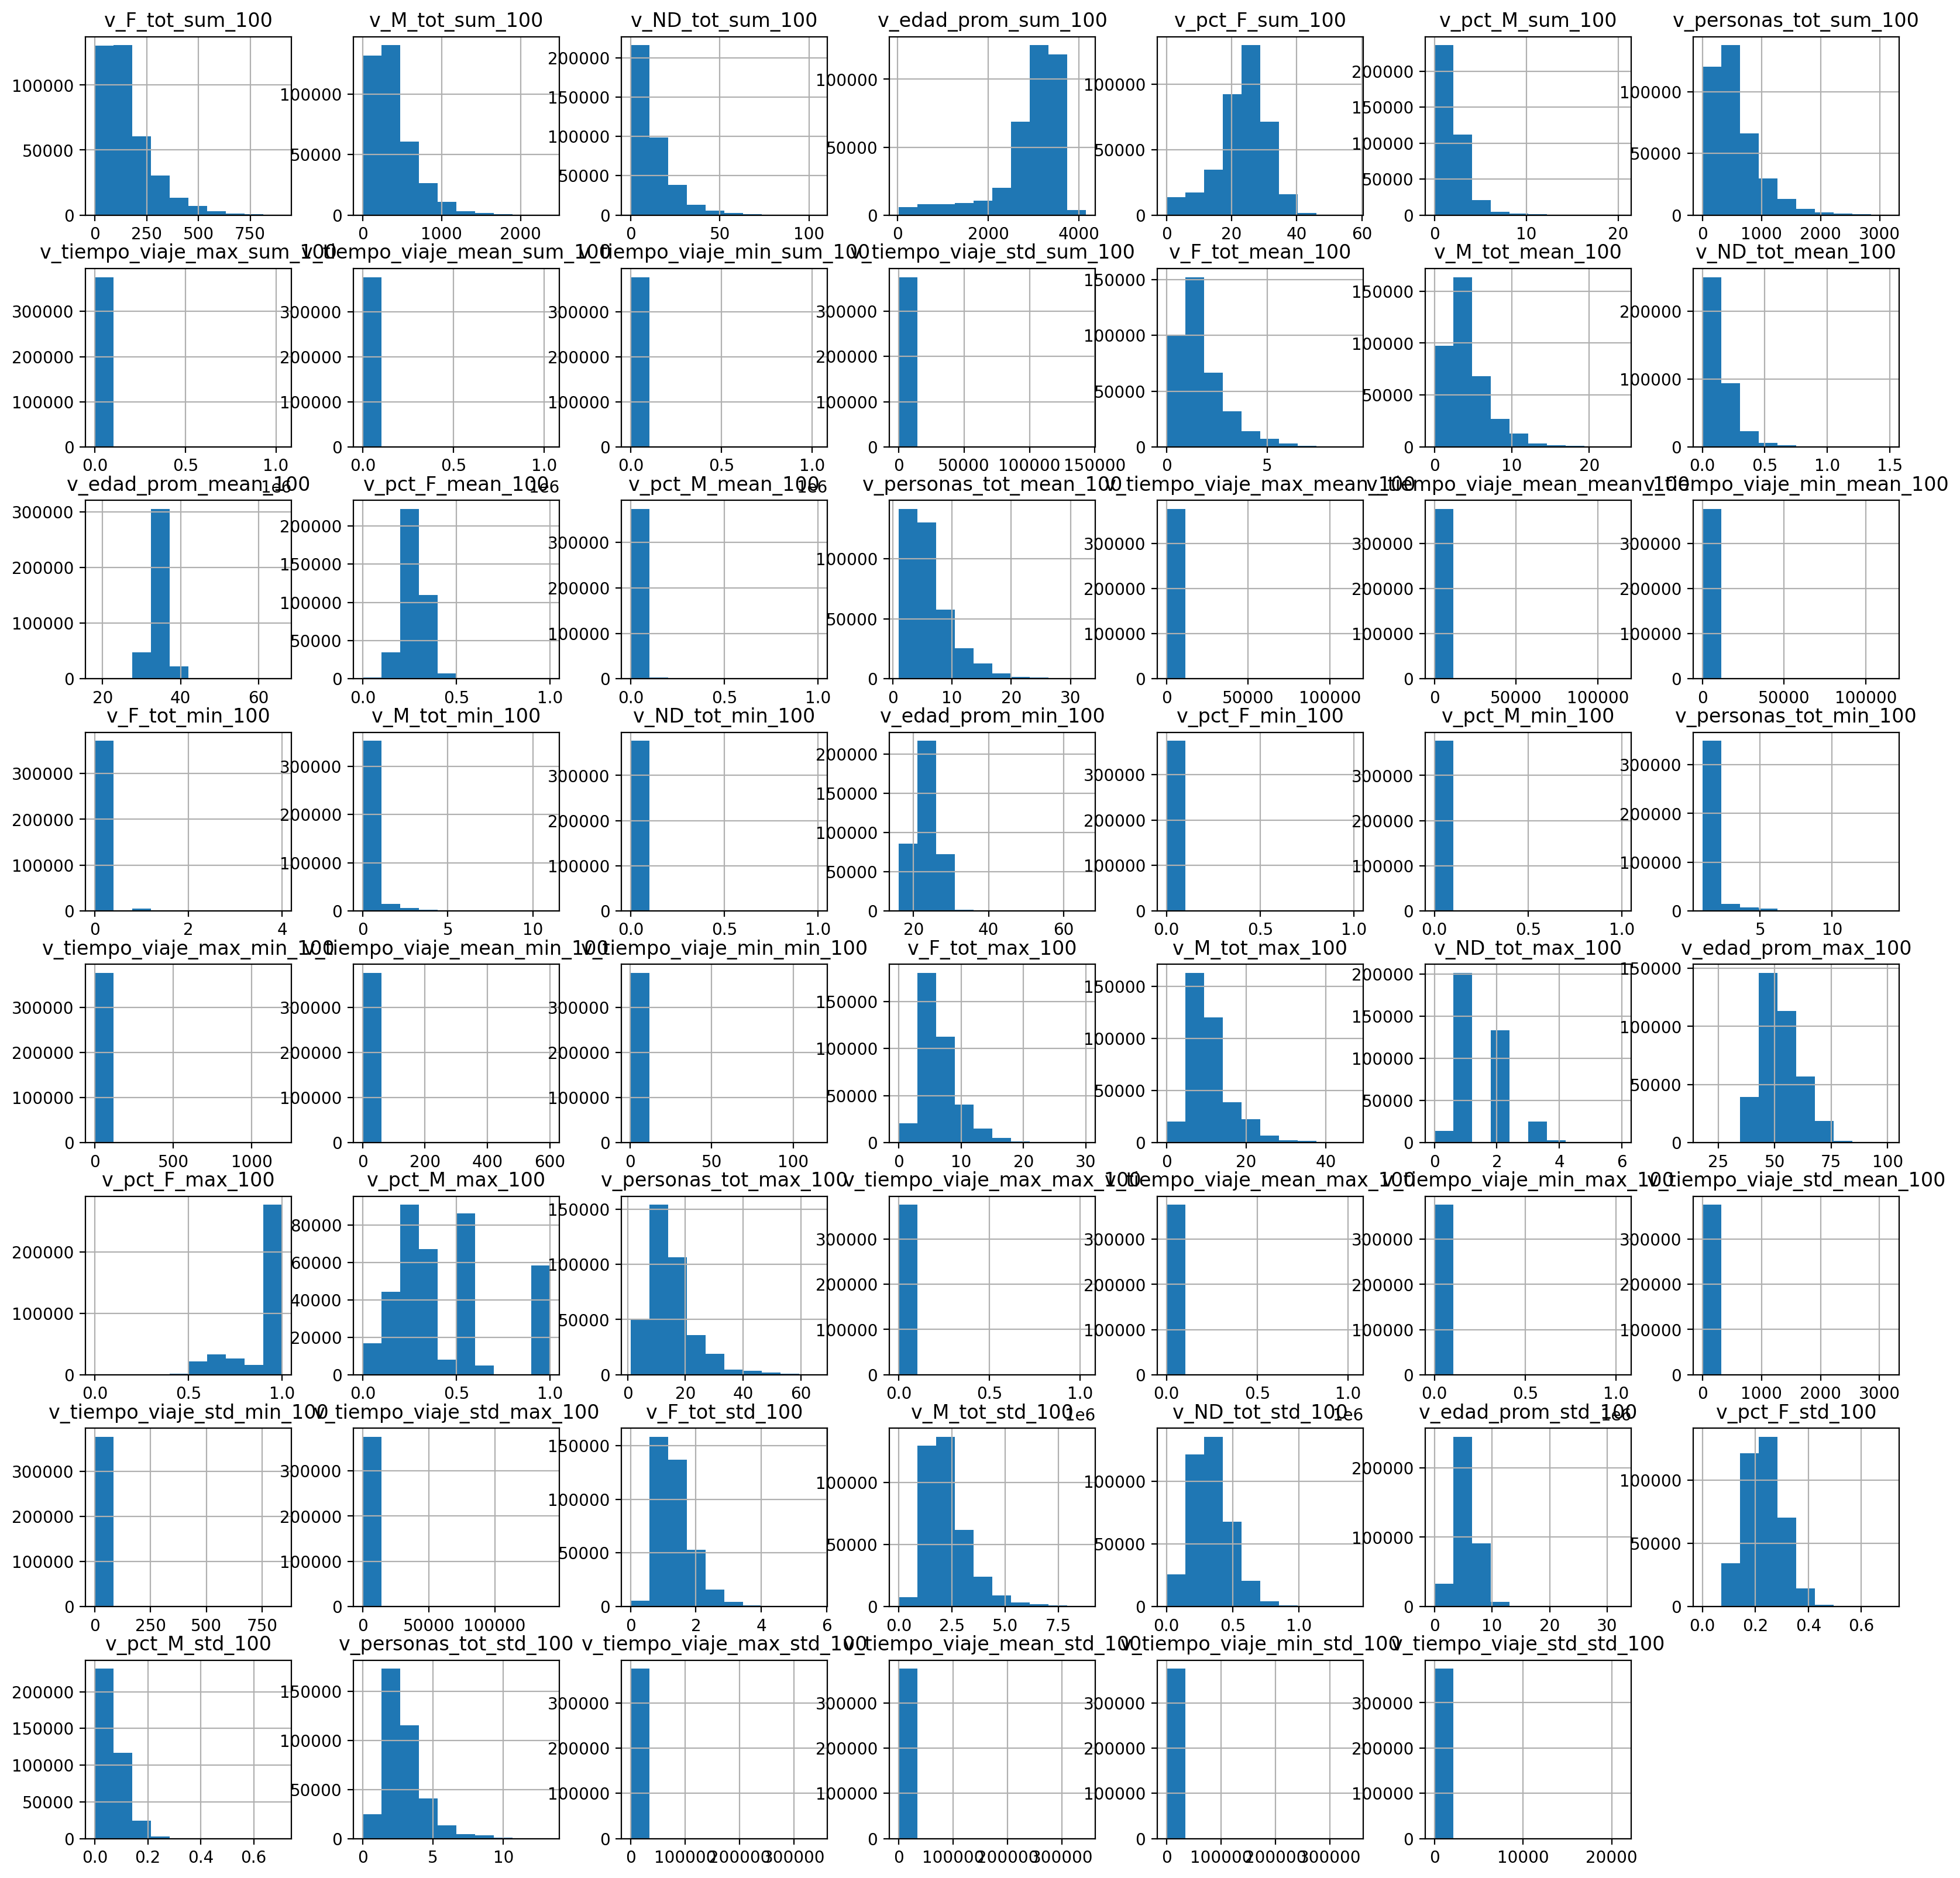

In [16]:
X[varc].hist(figsize=(20, 20))

### Valores ausentes

In [10]:
miss = 1 - X[varc].describe().T[['count']] / len(tad)
miss

,count
v_F_tot_sum_100,0.000000
v_M_tot_sum_100,0.000000
v_ND_tot_sum_100,0.000000
v_edad_prom_sum_100,0.000000
v_pct_F_sum_100,0.000000
v_pct_M_sum_100,0.000000
v_personas_tot_sum_100,0.000000
v_tiempo_viaje_max_sum_100,0.000000
v_tiempo_viaje_mean_sum_100,0.000000
v_tiempo_viaje_min_sum_100,0.000000


In [11]:
X.shape, X.dropna().shape, (X.dropna().shape[0] / X.shape[0])*100

((376643, 55), (375821, 55), 99.78175619884081)

### Imputración de Ausentes

In [14]:
from sklearn.impute import SimpleImputer

im = SimpleImputer(strategy='median')

im.fit(X)

SimpleImputer(strategy='median')

In [17]:
X[varc] = im.transform( X[varc] )

In [18]:
X.shape, X.dropna().shape, (X.dropna().shape[0] / X.shape[0])*100

((376643, 55), (376643, 55), 100.0)

### Validación de Distribución Alterada

In [20]:
from scipy.stats import ks_2samp

ks = pd.DataFrame(  map( lambda v: (v , ks_2samp(tad[v].dropna() , X[v] ).statistic   ), varc ) , columns=['Variable','KS']  )

In [21]:
# Lo ideal sería que el estadístico KS no pase el 0.1
ks

,Variable,KS
0,v_F_tot_sum_100,0.000000
1,v_M_tot_sum_100,0.000000
2,v_ND_tot_sum_100,0.000000
3,v_edad_prom_sum_100,0.000000
4,v_pct_F_sum_100,0.000000
5,v_pct_M_sum_100,0.000000
6,v_personas_tot_sum_100,0.000000
7,v_tiempo_viaje_max_sum_100,0.000000
8,v_tiempo_viaje_mean_sum_100,0.000000
9,v_tiempo_viaje_min_sum_100,0.000000


> __Si alguna variable llegara a sobrepasar el valor 0.1, es un variable "ROTA". No meter al modelo.__

### Varianza

In [22]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=1)

vt.fit( X[varc] )

VarianceThreshold(threshold=1)

In [24]:
sin_varianza = [v for v,u in zip( varc, vt.get_support() ) if not(u)]
sin_varianza

['v_ND_tot_mean_100',
 'v_pct_F_mean_100',
 'v_pct_M_mean_100',
 'v_F_tot_min_100',
 'v_M_tot_min_100',
 'v_ND_tot_min_100',
 'v_pct_F_min_100',
 'v_pct_M_min_100',
 'v_personas_tot_min_100',
 'v_tiempo_viaje_min_min_100',
 'v_ND_tot_max_100',
 'v_pct_F_max_100',
 'v_pct_M_max_100',
 'v_F_tot_std_100',
 'v_ND_tot_std_100',
 'v_pct_F_std_100',
 'v_pct_M_std_100']

array([[<Axes: title={'center': 'v_ND_tot_mean_100'}>,
        <Axes: title={'center': 'v_pct_F_mean_100'}>,
        <Axes: title={'center': 'v_pct_M_mean_100'}>,
        <Axes: title={'center': 'v_F_tot_min_100'}>],
       [<Axes: title={'center': 'v_M_tot_min_100'}>,
        <Axes: title={'center': 'v_ND_tot_min_100'}>,
        <Axes: title={'center': 'v_pct_F_min_100'}>,
        <Axes: title={'center': 'v_pct_M_min_100'}>],
       [<Axes: title={'center': 'v_personas_tot_min_100'}>,
        <Axes: title={'center': 'v_tiempo_viaje_min_min_100'}>,
        <Axes: title={'center': 'v_ND_tot_max_100'}>,
        <Axes: title={'center': 'v_pct_F_max_100'}>],
       [<Axes: title={'center': 'v_pct_M_max_100'}>,
        <Axes: title={'center': 'v_F_tot_std_100'}>,
        <Axes: title={'center': 'v_ND_tot_std_100'}>,
        <Axes: title={'center': 'v_pct_F_std_100'}>],
       [<Axes: title={'center': 'v_pct_M_std_100'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

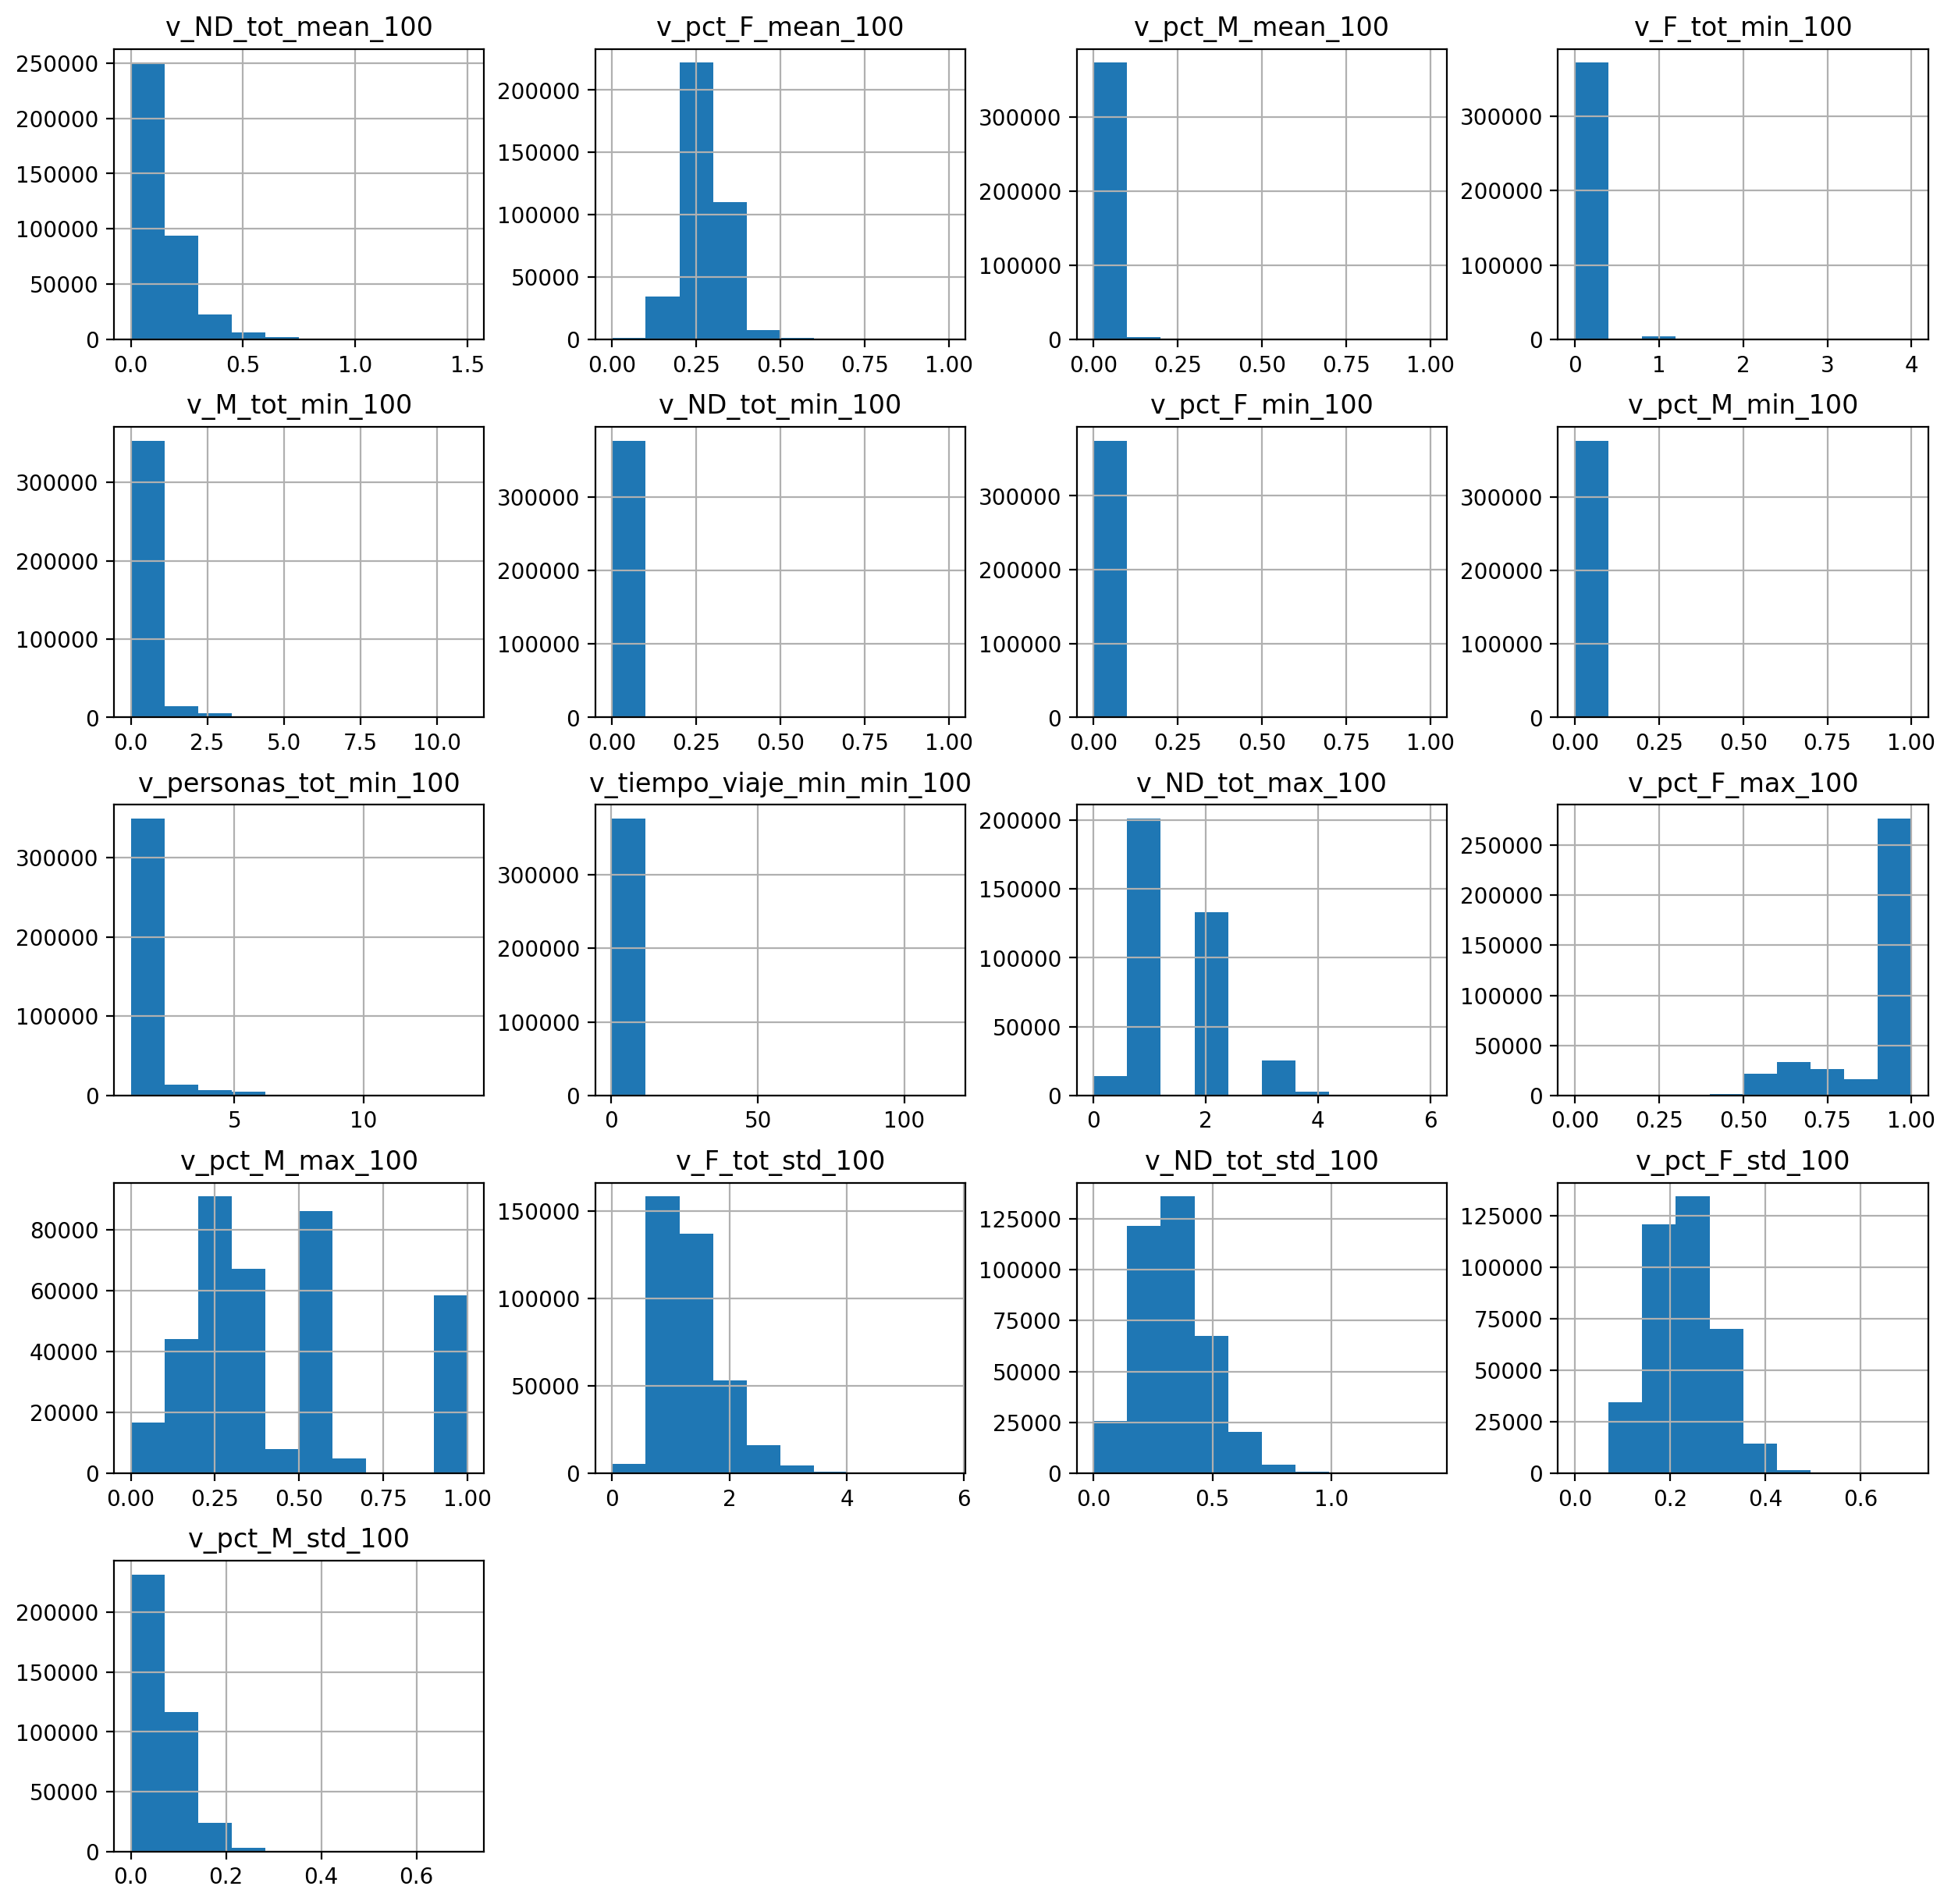

In [26]:
X[sin_varianza].hist(
    figsize=(15, 15)
)

In [27]:
X[sin_varianza].describe(percentiles=np.arange(0,1.01,.1))

,v_ND_tot_mean_100,v_pct_F_mean_100,v_pct_M_mean_100,v_F_tot_min_100,v_M_tot_min_100,v_ND_tot_min_100,v_pct_F_min_100,v_pct_M_min_100,v_personas_tot_min_100,v_tiempo_viaje_min_min_100,v_ND_tot_max_100,v_pct_F_max_100,v_pct_M_max_100,v_F_tot_std_100,v_ND_tot_std_100,v_pct_F_std_100,v_pct_M_std_100
count,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000,376643.000000
mean,0.134220,0.274794,0.022931,0.015293,0.343049,0.000050,0.001466,0.000025,1.320003,1.858424,1.477643,0.913861,0.421767,1.342481,0.332544,0.231632,0.070864
std,0.116584,0.062026,0.019884,0.134405,0.753112,0.007102,0.018029,0.004025,0.939386,0.899990,0.719962,0.154021,0.283404,0.554836,0.151323,0.068679,0.045015
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.233333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.233333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,0.025000,0.201382,0.005529,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.200000,1.000000,0.666667,0.142857,0.776737,0.158088,0.143814,0.028111
20%,0.044944,0.226421,0.009498,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.366667,1.000000,0.750000,0.200000,0.898161,0.213021,0.169997,0.037588
30%,0.062500,0.244457,0.012833,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.500000,1.000000,1.000000,0.250000,1.003704,0.250841,0.190901,0.044935
40%,0.081633,0.259789,0.015849,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.633333,1.000000,1.000000,0.300000,1.108893,0.287623,0.209614,0.052499
50%,0.102273,0.273079,0.018913,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.750000,1.000000,1.000000,0.333333,1.227143,0.320245,0.227282,0.060119


In [28]:
len(sin_varianza)

17

In [ ]:
X.drop( sin_varianza, axis=1, inplace=True )

In [32]:
varc = [ v for v in varc if v not in sin_varianza ]
len(varc)

38

### Valores extremos

__Cerca percentil__

In [33]:
ext = X[varc].describe( percentiles=[0.01,0.99] ).T[['1%','99%']].reset_index()
for v, li, ls in ext.values:
    X[f'ol_{v}'] = (( X[v] < li ) | ( X[v] > ls )).astype(int)

X['ext'] = X.filter(like='ol').max(axis=1)
X.drop( X.filter(like='ol').columns , axis=1 , inplace=True)

print(X['ext'].value_counts(1)*100)

ext
0    79.530749
1    20.469251
Name: proportion, dtype: float64


__Cerca Intercuartil__

In [34]:
k = 2

ext = X[varc].describe().T[['mean', '25%', '75%']].reset_index()

In [35]:
ext['IQR'] = ext['75%'] - ext['25%']
ext['li'] = ext['mean'] - k*ext['IQR']
ext['ls'] = ext['mean'] + k*ext['IQR']
ext = ext[['index', 'li', 'ls']]

In [36]:
for v, li, ls in ext.values:
    X[f'ol_{v}'] = (( X[v] < li ) | ( X[v] > ls )).astype(int)

In [37]:
X['ext_iqr'] = X.filter(like='ol').max(axis=1)
X.drop( X.filter(like='ol').columns , axis=1 , inplace=True)

print(X['ext_iqr'].value_counts(1)*100)

ext_iqr
1    100.0
Name: proportion, dtype: float64


__Antes de eliminar registros, asegurar que se tiene el identificador del registro ( Unidad muestral)__

In [38]:
X.shape, tad.shape

((376643, 40), (376643, 58))

In [39]:
X[um] = tad[um]

In [40]:
X

,v_F_tot_sum_100,v_M_tot_sum_100,v_ND_tot_sum_100,v_edad_prom_sum_100,v_pct_F_sum_100,v_pct_M_sum_100,v_personas_tot_sum_100,v_tiempo_viaje_max_sum_100,v_tiempo_viaje_mean_sum_100,v_tiempo_viaje_min_sum_100,v_tiempo_viaje_std_sum_100,v_F_tot_mean_100,v_M_tot_mean_100,v_edad_prom_mean_100,v_personas_tot_mean_100,v_tiempo_viaje_max_mean_100,v_tiempo_viaje_mean_mean_100,v_tiempo_viaje_min_mean_100,v_edad_prom_min_100,v_tiempo_viaje_max_min_100,v_tiempo_viaje_mean_min_100,v_F_tot_max_100,v_M_tot_max_100,v_edad_prom_max_100,v_personas_tot_max_100,v_tiempo_viaje_max_max_100,v_tiempo_viaje_mean_max_100,v_tiempo_viaje_min_max_100,v_tiempo_viaje_std_mean_100,v_tiempo_viaje_std_min_100,v_tiempo_viaje_std_max_100,v_M_tot_std_100,v_edad_prom_std_100,v_personas_tot_std_100,v_tiempo_viaje_max_std_100,v_tiempo_viaje_mean_std_100,v_tiempo_viaje_min_std_100,v_tiempo_viaje_std_std_100,ext,ext_iqr,Ciclo_Estacion_Retiro,ancla
0,19.0,93.0,1.0,303.290312,1.459266,0.052632,113.0,274.133333,105.673025,33.083333,71.202222,2.375000,11.625000,37.911289,14.125000,34.266667,13.209128,4.135417,30.142857,19.183333,10.602381,5.0,21.0,41.428571,26.0,54.150000,17.307018,6.600000,8.900278,5.344537,11.306875,5.950690,3.571382,6.685539,11.716506,2.384026,1.398935,1.855736,1,1,001,202
1,15.0,19.0,2.0,280.416667,3.250000,0.750000,36.0,179.066667,95.234722,44.050000,60.043060,1.875000,2.375000,35.052083,4.500000,22.383333,11.904340,5.506250,32.500000,6.866667,4.358333,3.0,4.0,39.000000,6.0,32.250000,15.970833,11.750000,7.505383,3.547319,13.603440,1.302470,2.545591,1.414214,7.739771,3.393009,3.308670,3.396134,1,1,002,202
2,24.0,56.0,0.0,291.052742,2.318975,0.000000,80.0,274.150000,121.380975,35.300000,74.330705,3.000000,7.000000,36.381593,10.000000,34.268750,15.172622,4.412500,32.909091,13.400000,7.858333,9.0,11.0,43.100000,14.0,84.000000,22.790909,8.250000,9.291338,4.633702,22.704544,3.116775,4.109456,2.878492,21.220837,4.119011,2.434014,5.743147,1,1,005,202
3,21.0,55.0,1.0,293.541880,2.349573,0.066667,77.0,291.766667,114.168526,41.966667,72.220109,2.625000,6.875000,36.692735,9.625000,36.470833,14.271066,5.245833,30.384615,9.333333,6.104167,5.0,11.0,45.666667,15.0,119.183333,20.258974,17.566667,9.027514,1.267251,30.307828,3.356763,5.150489,4.274091,34.658066,4.685169,5.121018,9.073715,1,1,006,202
4,30.0,93.0,2.0,304.940702,2.103975,0.121795,125.0,285.350000,123.280836,37.400000,72.645566,3.750000,11.625000,38.117588,15.625000,35.668750,15.410104,4.675000,32.952381,20.850000,12.068889,6.0,19.0,44.466667,26.0,44.900000,20.045833,7.166667,9.080696,5.174310,13.814188,5.262740,4.451326,5.804862,9.677455,2.500899,1.348897,3.333633,1,1,007,202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376638,97.0,211.0,11.0,2979.416270,30.377381,3.750000,319.0,2587.283333,1614.850172,887.883333,838.646131,1.021053,2.221053,31.362277,3.357895,27.234561,16.998423,9.346140,21.000000,4.166667,4.166667,4.0,7.0,49.000000,9.0,57.550000,57.383333,57.383333,11.034818,0.023570,30.476302,1.751467,5.537181,2.057244,13.636744,9.076018,8.986040,6.372457,0,1,705,897
376639,31.0,103.0,1.0,2321.000000,16.033333,0.500000,135.0,1169.766667,863.489722,602.550000,328.850820,0.469697,1.560606,35.166667,2.045455,17.723737,13.083178,9.129545,21.500000,3.483333,3.308333,2.0,5.0,72.000000,6.0,53.383333,40.083333,40.083333,8.020752,0.011785,26.351513,1.068842,9.442550,1.156012,11.912023,8.646444,8.376988,6.621451,0,1,706,897
376640,106.0,168.0,3.0,3328.653968,33.488095,1.416667,277.0,2275.216667,1537.807130,897.500000,694.176516,1.139785,1.806452,35.791978,2.978495,24.464695,16.535561,9.650538,21.000000,1.633333,1.633333,4.0,6.0,57.000000,9.0,63.150000,45.783333,45.783333,9.641340,0.058926,31.218764,1.279080,6.776031,1.744423,13.405024,8.846674,8.434987,6.171334,0,1,708,897
376641,345.0,632.0,49.0,3392.769815,30.465822,4.951016,1026.0,6093.766667,2790.779076,944.933333,1691.251409,3.52040

In [41]:
X = X.loc[ X['ext'] == 0 ].reset_index(drop=True).drop(['ext','ext_iqr'],axis=1)

array([[<Axes: title={'center': 'v_F_tot_sum_100'}>,
        <Axes: title={'center': 'v_M_tot_sum_100'}>,
        <Axes: title={'center': 'v_ND_tot_sum_100'}>],
       [<Axes: title={'center': 'v_edad_prom_sum_100'}>,
        <Axes: title={'center': 'v_pct_F_sum_100'}>,
        <Axes: title={'center': 'v_pct_M_sum_100'}>],
       [<Axes: title={'center': 'v_personas_tot_sum_100'}>,
        <Axes: title={'center': 'v_tiempo_viaje_max_sum_100'}>,
        <Axes: title={'center': 'v_tiempo_viaje_mean_sum_100'}>]],
      dtype=object)

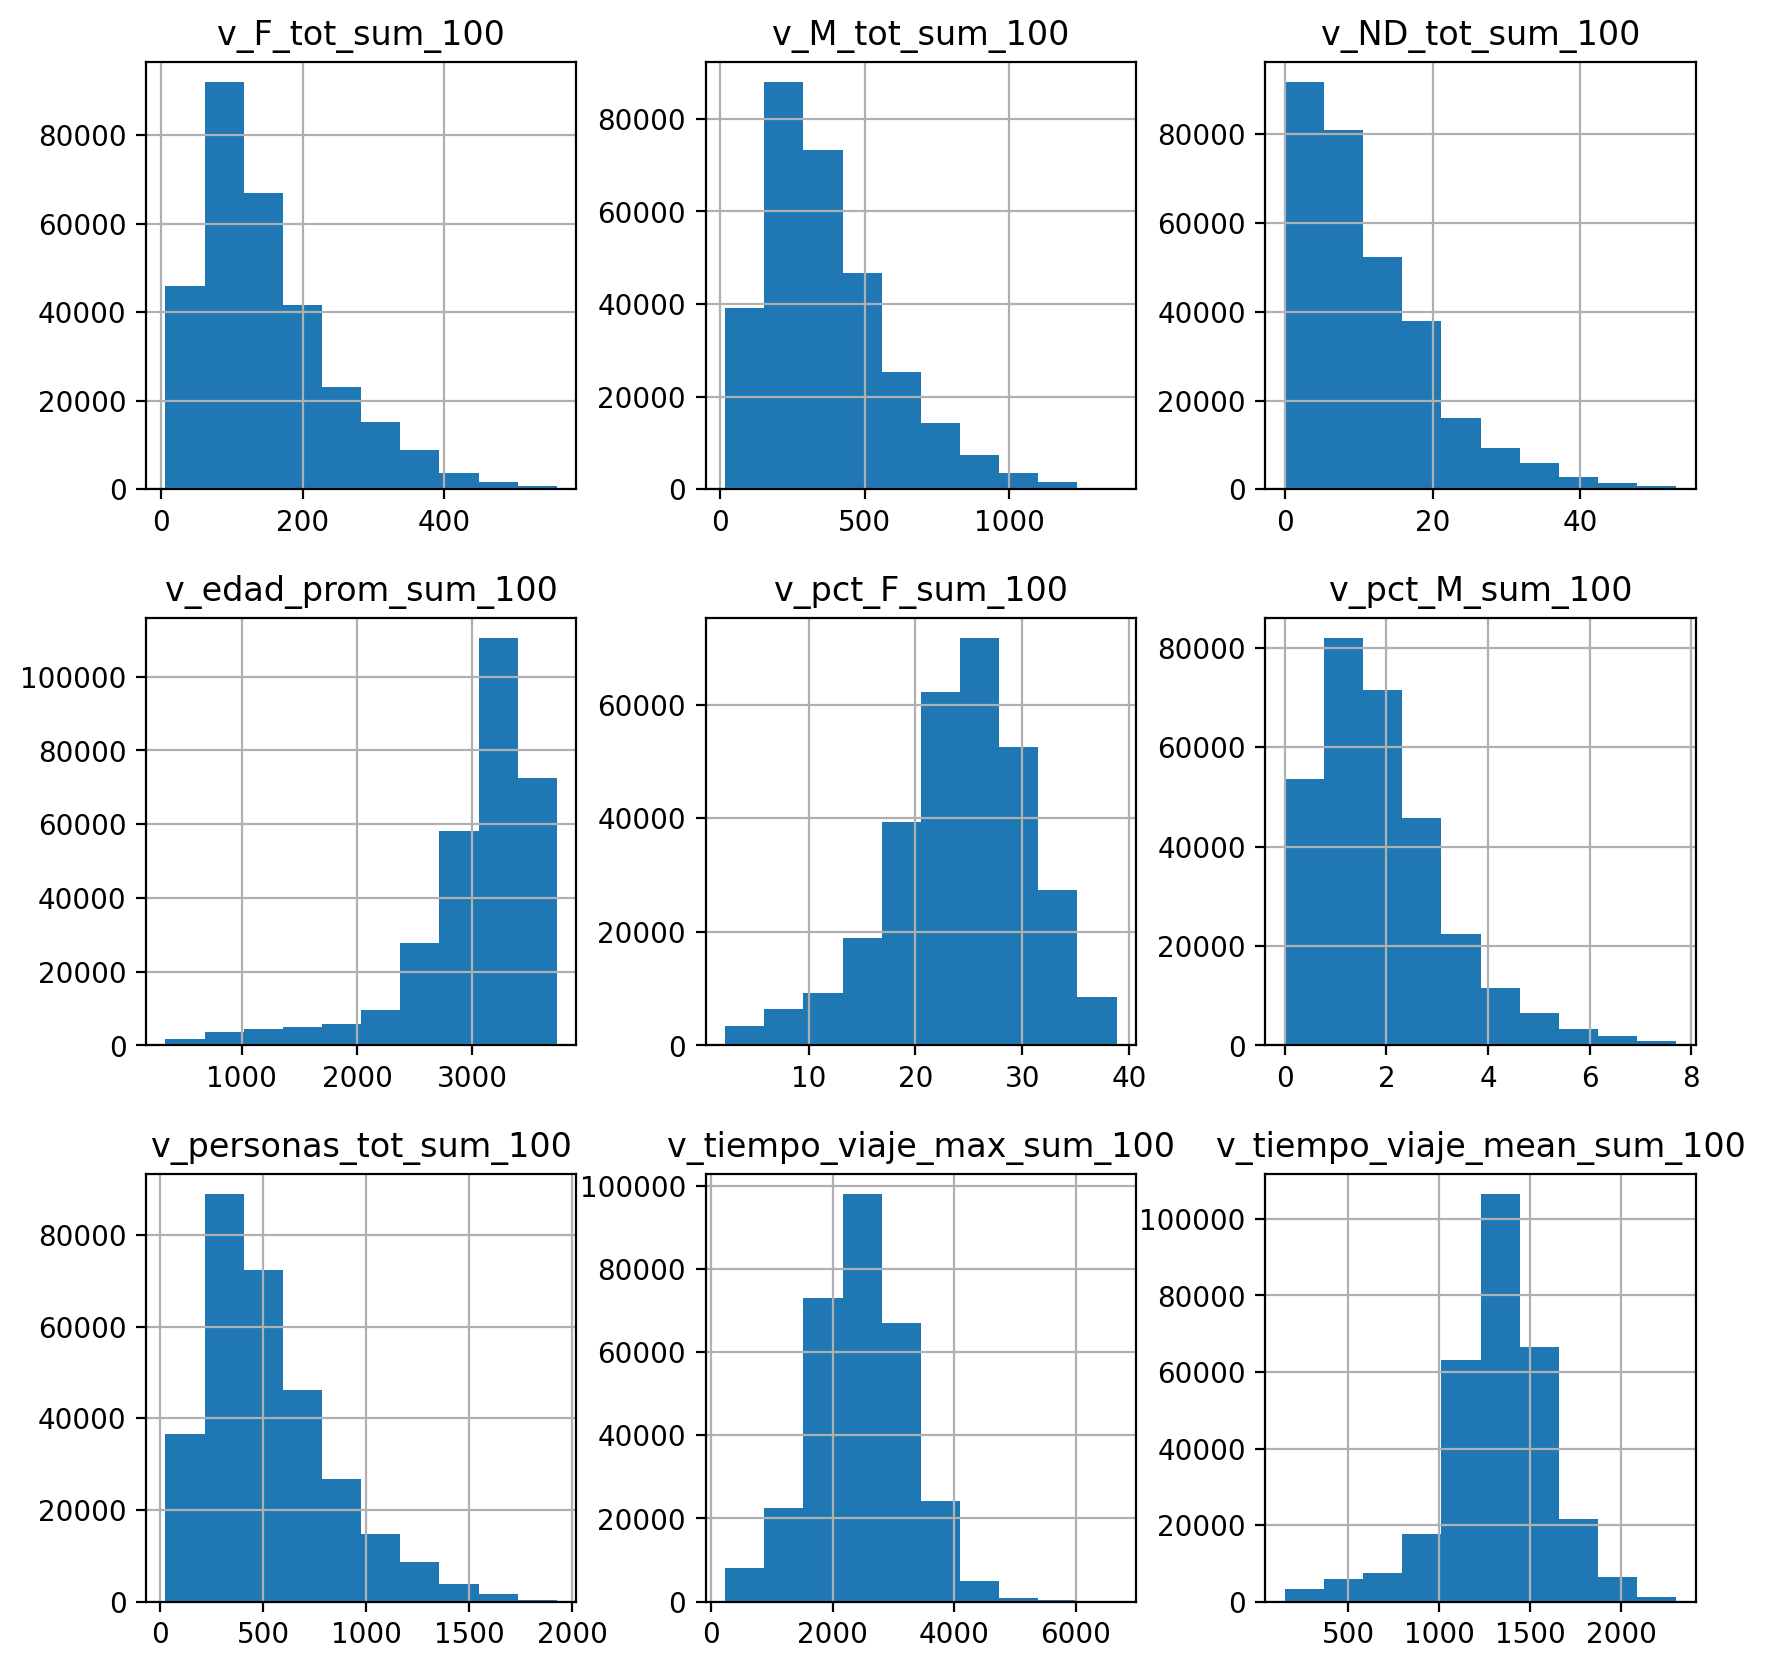

In [45]:
X[varc[:9]].hist(figsize=(10, 10))

### Analisis Bivariado

In [46]:
X[varc].corr()

,v_F_tot_sum_100,v_M_tot_sum_100,v_ND_tot_sum_100,v_edad_prom_sum_100,v_pct_F_sum_100,v_pct_M_sum_100,v_personas_tot_sum_100,v_tiempo_viaje_max_sum_100,v_tiempo_viaje_mean_sum_100,v_tiempo_viaje_min_sum_100,v_tiempo_viaje_std_sum_100,v_F_tot_mean_100,v_M_tot_mean_100,v_edad_prom_mean_100,v_personas_tot_mean_100,v_tiempo_viaje_max_mean_100,v_tiempo_viaje_mean_mean_100,v_tiempo_viaje_min_mean_100,v_edad_prom_min_100,v_tiempo_viaje_max_min_100,v_tiempo_viaje_mean_min_100,v_F_tot_max_100,v_M_tot_max_100,v_edad_prom_max_100,v_personas_tot_max_100,v_tiempo_viaje_max_max_100,v_tiempo_viaje_mean_max_100,v_tiempo_viaje_min_max_100,v_tiempo_viaje_std_mean_100,v_tiempo_viaje_std_min_100,v_tiempo_viaje_std_max_100,v_M_tot_std_100,v_edad_prom_std_100,v_personas_tot_std_100,v_tiempo_viaje_max_std_100,v_tiempo_viaje_mean_std_100,v_tiempo_viaje_min_std_100,v_tiempo_viaje_std_std_100
v_F_tot_sum_100,1.000000,0.906252,0.629980,0.480096,0.593652,0.076443,0.953756,0.782666,0.409372,-0.398746,0.695521,0.969729,0.867972,-0.058703,0.922147,0.685784,-0.030438,-0.694478,0.500211,0.584469,0.494484,0.851924,0.811316,-0.485385,0.852366,0.231828,-0.059536,-0.465575,0.314046,0.577332,0.120428,0.792405,-0.735621,0.839881,0.195151,-0.288624,-0.646423,0.023236
v_M_tot_sum_100,0.906252,1.000000,0.628259,0.519114,0.355859,0.057903,0.991076,0.821698,0.459902,-0.372041,0.723628,0.860147,0.965362,-0.019798,0.956667,0.717567,0.006213,-0.692654,0.504720,0.618955,0.539515,0.778897,0.906933,-0.493662,0.893069,0.233508,-0.058541,-0.466414,0.319348,0.597984,0.119193,0.902125,-0.754734,0.891931,0.193894,-0.299678,-0.651077,0.016547
v_ND_tot_sum_100,0.629980,0.628259,1.000000,0.367012,0.296723,0.678447,0.658180,0.565768,0.302022,-0.286442,0.515726,0.596641,0.595731,0.000944,0.630140,0.489429,-0.025067,-0.507902,0.363431,0.419549,0.364159,0.539192,0.557058,-0.343166,0.581150,0.161861,-0.053343,-0.347150,0.231771,0.416501,0.080482,0.529483,-0.523488,0.557375,0.134462,-0.219624,-0.480716,0.010573
v_edad_prom_sum_100,0.480096,0.519114,0.367012,1.000000,0.665797,0.236056,0.518555,0.701506,0.760607,0.287664,0.712634,0.294822,0.320478,0.171521,0.319991,0.229206,-0.118898,-0.402478,0.121281,0.069343,0.030223,0.331392,0.356996,-0.020261,0.344714,0.129235,0.035931,-0.108026,0.076364,0.058559,0.102185,0.313288,-0.285630,0.308155,0.076350,-0.148697,-0.317359,0.013000
v_pct_F_sum_100,0.593652,0.355859,0.296723,0.665797,1.000000,0.147978,0.436496,0.531088,0.510202,0.111486,0.540645,0.485747,0.205339,-0.121236,0.297193,0.193477,-0.149698,-0.377267,0.095067,0.075534,0.026044,0.432270,0.236677,-0.125962,0.301003,0.114067,0.014541,-0.136341,0.070149,0.080198,0.086506,0.201844,-0.311172,0.264794,0.075007,-0.133094,-0.305587,0.018589
v_pct_M_sum_100,0.076443,0.057903,0.678447,0.236056,0.147978,1.000000,0.082916,0.148244,0.169683,0.073271,0.165386,0.024050,-0.002070,-0.001668,0.026783,0.020069,-0.057738,-0.096126,-0.012773,-0.007765,-0.018137,0.044848,0.013363,-0.009220,0.033280,0.021555,-0.005761,-0.026257,0.010556,0.000653,0.014166,-0.011312,-0.052593,0.004427,0.008307,-0.044188,-0.076415,-0.003500
v_personas_tot_sum_100,0.953756,0.991076,0.658180,0.518555,0.436496,0.082916,1.000000,0.827230,0.453936,-0.388785,0.730888,0.911407,0.954364,-0.031525,0.965587,0.722960,-0.005539,-0.708668,0.514439,0.621401,0.537091,0.817386,0.895284,-0.501652,0.898638,0.237948,-0.060445,-0.476721,0.324811,0.604483,0.122029,0.885431,-0.764970,0.893400,0.198382,-0.303033,-0.664304,0.018888
v_tiempo_viaje_max_sum_100,0.782666,0.821698,0.565768,0.701506,0.531088,0.148244,0.827230,1.000000,0.801262,-0.021672,0.966107,0.686854,0.724351,-0.014062,0.731414,0.830480,0.287784,-0.501941,0.358613,0.492803,0.454086,0.664893,0.713021,-0.358311,0.718554,0.487361,0.234516,-0.270321,0.602830,0.431324,0.398853,0.690112,-0.628179,0.697467,0.446140,0.004561,-0.460303,0.296988
v_tiempo_viaje_mean_sum_100,0.409372,0.459902,0.302022,0.760607,0.510202,0.169683,0.453936,0.801262,1.000000,0.534989,0.783449,0.263570,0.305108,-0.032197,0.2

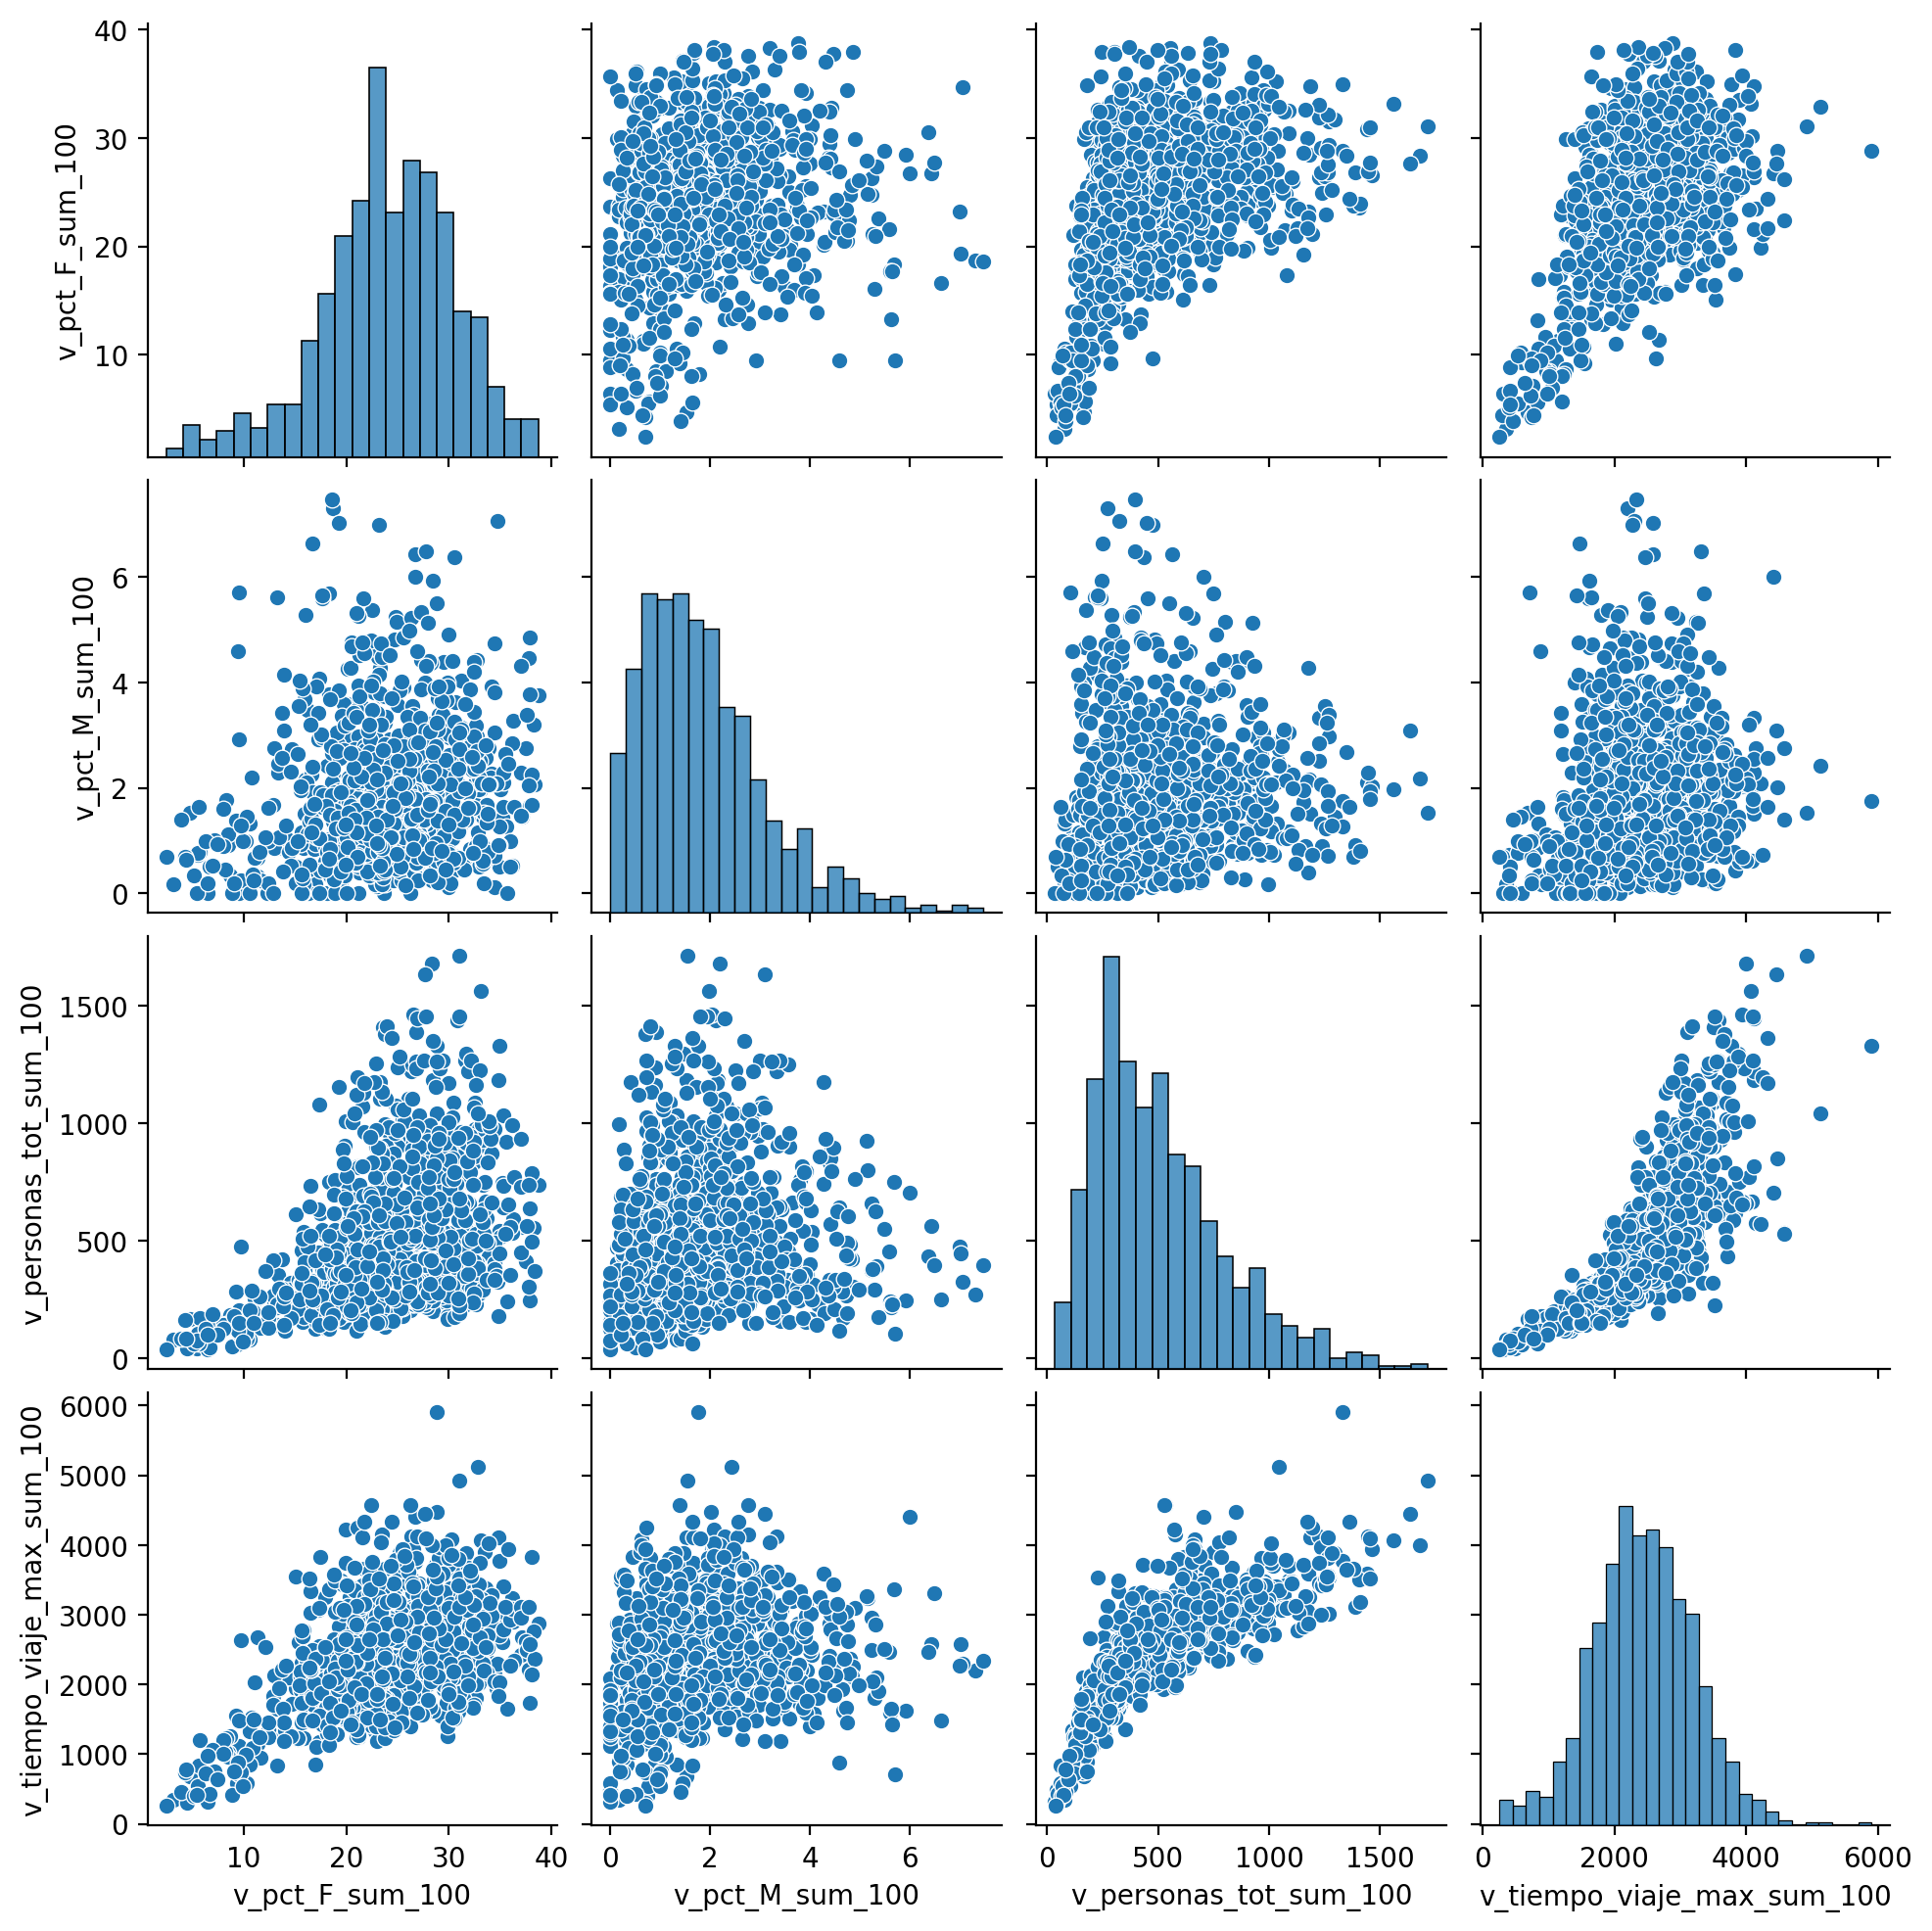

In [49]:
import seaborn as sns

sns.pairplot( X[varc[4:8]].sample(1000) )

### Multicolinealidad

In [50]:
### Actualizar varclushi
!pip install --upgrade varclushi

In [51]:
from varclushi import VarClusHi

# Para los clusters de variables conbase en su correlación
vc = VarClusHi( df=X[varc], feat_list=varc )

# Aqui se genera el cluster
vc.varclus()

In [52]:
rs = vc.rsquare
rs = rs.sort_values( by=['Cluster','RS_Ratio'] , ascending=[1,1] ).reset_index(drop=True)
rs['id'] = rs.groupby( 'Cluster' ).cumcount() + 1
rs

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio,id
0,0,v_personas_tot_mean_100,0.971410,0.526937,0.060436,1
1,0,v_personas_tot_sum_100,0.939442,0.465399,0.113277,2
2,0,v_M_tot_mean_100,0.942227,0.521272,0.120679,3
3,0,v_M_tot_sum_100,0.916302,0.440730,0.149657,4
4,0,v_personas_tot_std_100,0.897843,0.392755,0.168230,5
5,0,v_personas_tot_max_100,0.897184,0.420839,0.177525,6
6,0,v_M_tot_std_100,0.867343,0.391432,0.217983,7
7,0,v_M_tot_max_100,0.870703,0.412799,0.220192,8
8,0,v_F_tot_mean_100,0.874059,0.449714,0.228864,9
9,0,v_F_tot_sum_100,0.865539,0.452924,0.245782,10


In [53]:
varc = rs.loc[rs['id'] == 1]['Variable'].tolist()
varc

['v_personas_tot_mean_100',
 'v_tiempo_viaje_std_std_100',
 'v_edad_prom_sum_100',
 'v_tiempo_viaje_min_std_100',
 'v_tiempo_viaje_max_min_100',
 'v_tiempo_viaje_mean_mean_100']

In [54]:
tad_01 = X[um + varc].merge( tad[um + [tgt] ] , on = um , how='inner' ).reset_index(drop=True)
tad_01.to_parquet("../data/ecobici/TAD_FINAL_ECO.parquet")

### Ajuste una Regresion Lineal$$y = \theta x + \theta_0$$

In [55]:
tad_01.shape

(299547, 9)

<Axes: >

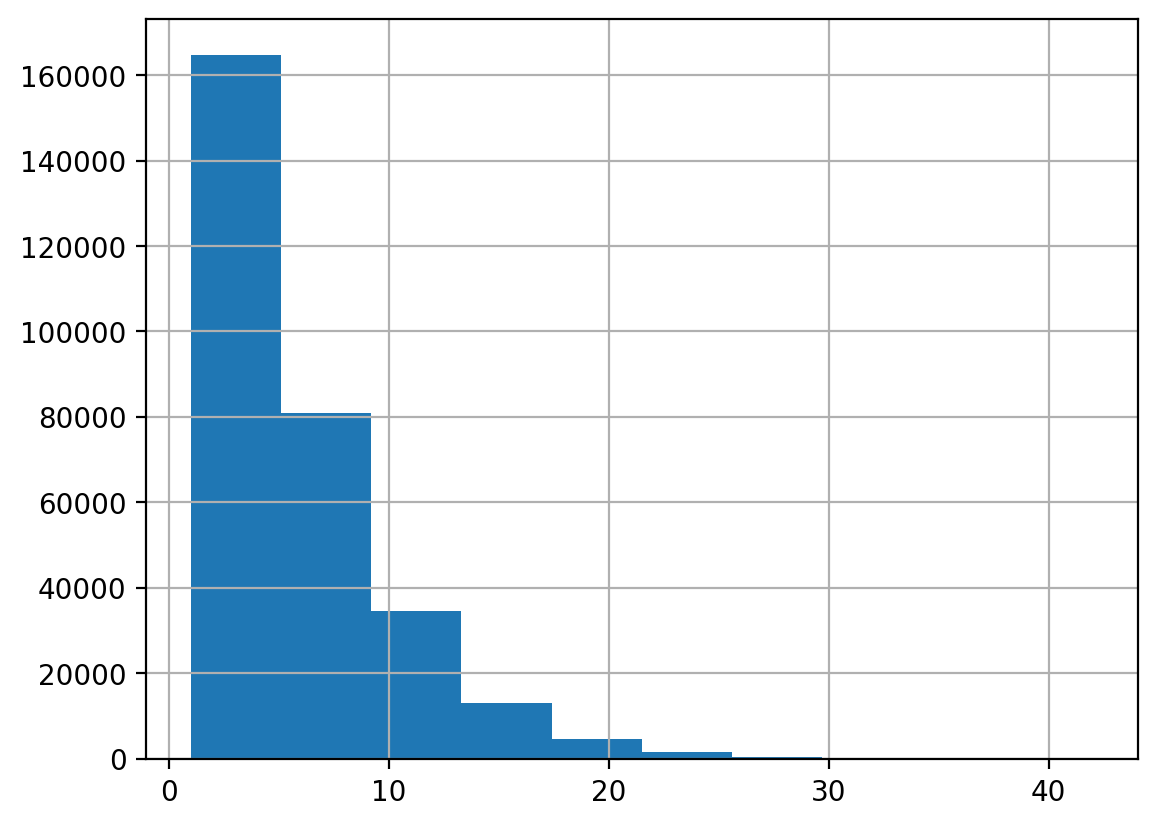

In [57]:
tad_01[tgt].hist()

<Axes: >

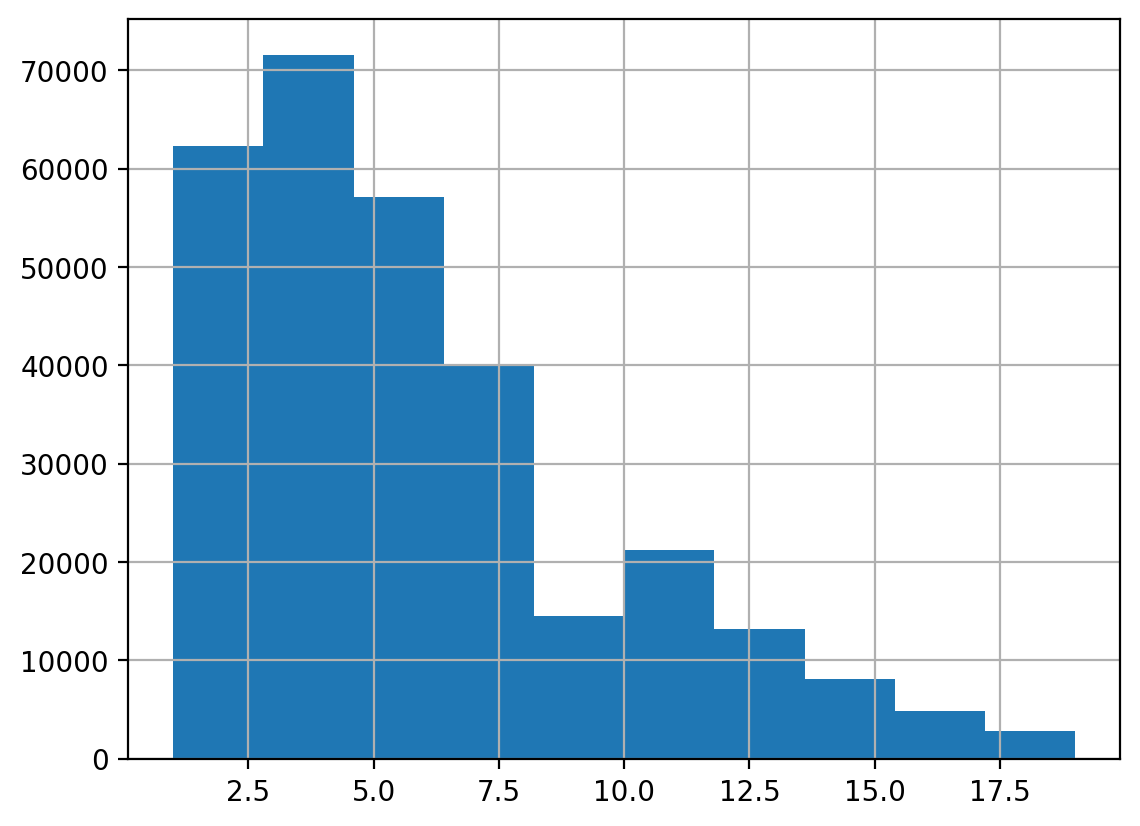

In [58]:
tad_01 = tad_01.loc[ tad_01[tgt] < 20 ].reset_index()
tad_01[tgt].hist()

In [59]:
tad_01.shape

(295836, 10)